## PPG Feature Extraction 

In [2]:
# Initialize package
import sys
import rndSignal
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

We can generate signals using the neurokit simulate functions.  
Refer generating of biosignals here: https://neurokit2.readthedocs.io/en/latest/

In [3]:
# Generate 40 seconds ppg signals using neurokit built-in function
import neurokit2 as nk

ppg_signal = nk.ppg_simulate(
            duration = 40,
            sampling_rate = 1000,
            heart_rate = 60
        )
rndSignal.plot_signal(
    [ppg_signal],
    [1000], 
    x_axis_label = "Time (seconds)",
    y_axis_label = "Raw PPG Data"
)

### Signal Preprocessing and Filtering  using `savvyppg.ppg_module.ppgSignal()`
This module will automatically process the signal by filtering out noises and motion artifacts, and compute/evaluate the detected beats of the processed ppg signal
Import the class `ppgSignal` from `savvyppg.ppg_module` 
This will return a collection of attributes.
* `fs` - sampling frequency
* `data_ppg` - processes ppg signal (filtered)
* `data_fdppg` - first derivative of the ppg signal
* `data_sdppg` - second derivative of the ppg_signal
* `beats_num` - number of beats detected
* `beats_df` - dataframe of the beats indices and the signal quality assessment

We get the processed signal by calling the `data_ppg`

In [4]:
# Process the signal using savvyppg (filtering, motion artifact removal and signal quality evaluation)
savvyppg_signal = rndSignal.ppgSignal(ppg_signal, 1000, predict_beats=True)

# Plot the processed signal
rndSignal.plot_filtered(ppg_signal,savvyppg_signal.data_ppg,1000)

### Time Domain Features

#### Heart Rate Feature and Visualization
Derive the heart rate features from the ppg signal using `ppg_heart_rate` from `extract_features.ppg_features`. We can visualize the heart rate by setting `show = True` 

In [5]:
# Calculate the bpm and visualize the result by adding show_plot = True
rndSignal.ppg_heart_rate(savvyppg_signal.data_ppg,1000,show = True)

mean_bpm    sd_bpm    max_bpm    min_bpm
0  60.126439  4.812474  72.289157  52.770449

### Heart Rate Variability (Time Domain)
Contains time domain HRV metrics: (from Neurokit2 package)

- **RMSSD**: The square root of the mean of the sum of successive differences between
adjacent RR intervals. It is equivalent (although on another scale) to SD1, and
therefore it is redundant to report correlations with both (Ciccone, 2017).

- **MeanNN**: The mean of the RR intervals.

- **SDNN**: The standard deviation of the RR intervals.

- **SDSD**: The standard deviation of the successive differences between RR intervals.

- **CVNN**: The standard deviation of the RR intervals (SDNN) divided by the mean of the RR
intervals (MeanNN).

- **CVSD**: The root mean square of the sum of successive differences (RMSSD) divided by the 
mean of the RR intervals (MeanNN).

- **MedianNN**: The median of the absolute values of the successive differences between RR intervals.

- **MadNN**: The median absolute deviation of the RR intervals.

- **HCVNN**: The median absolute deviation of the RR intervals (MadNN) divided by the median
of the absolute differences of their successive differences (MedianNN).

- **IQRNN**: The interquartile range (IQR) of the RR intervals.

- **pNN50**: The proportion of RR intervals greater than 50ms, out of the total number of RR intervals.

- **pNN20**: The proportion of RR intervals greater than 20ms, out of the total number of RR intervals.

- **TINN**: A geometrical parameter of the HRV, or more specifically, the baseline width of
the RR intervals distribution obtained by triangular interpolation, where the error of least
squares determines the triangle. It is an approximation of the RR interval distribution.

- **HTI**: The HRV triangular index, measuring the total number of RR intervals divded by the
height of the RR intervals histogram.


HRV_RMSSD  HRV_MeanNN   HRV_SDNN   HRV_SDSD  HRV_CVNN  HRV_CVSD  \
0  91.680261  999.078947  87.615678  92.943095  0.087696  0.091765   

   HRV_MedianNN  HRV_MadNN  HRV_MCVNN  HRV_IQRNN  HRV_pNN50  HRV_pNN20  \
0         996.5     88.956   0.089268      108.5  60.526316  89.473684   

   HRV_TINN  HRV_HTI  
0     308.0     4.75

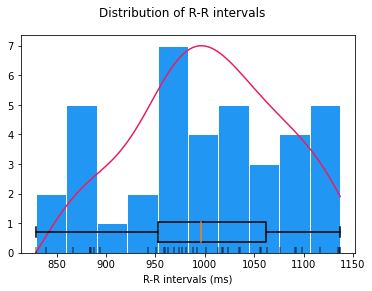

In [7]:
rndSignal.ppg_hrv_time(savvyppg_signal.data_ppg,1000, show = True)

### HRV Frequency Domain Features

Contains frequency domain HRV metrics: (from Neurokit2 package)

- **ULF**: The spectral power density pertaining to ultra low frequency band i.e., .0 to .0033 Hz
by default.

- **VLF**: The spectral power density pertaining to very low frequency band i.e., .0033 to .04 Hz
by default.

- **LF**: The spectral power density pertaining to low frequency band i.e., .04 to .15 Hz by default.

- **HF**: The spectral power density pertaining to high frequency band i.e., .15 to .4 Hz by default.

- **VHF**: The variability, or signal power, in very high frequency i.e., .4 to .5 Hz by default.

- **LFn**: The normalized low frequency, obtained by dividing the low frequency power by
the total power.

- **HFn**: The normalized high frequency, obtained by dividing the low frequency power by
the total power.

- **LnHF**: The log transformed HF.


HRV_ULF  HRV_VLF  HRV_LF    HRV_HF  HRV_VHF  HRV_LFHF  HRV_LFn  HRV_HFn  \
0      NaN      NaN     NaN  0.028178  0.00481       NaN      NaN  0.85419   

   HRV_LnHF  
0 -3.569205

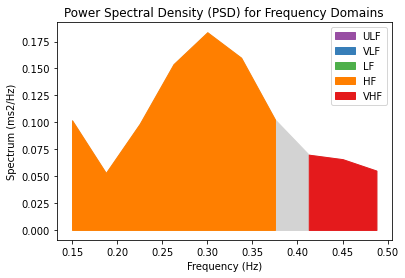

In [8]:
rndSignal.ppg_hrv_freq(savvyppg_signal.data_ppg,1000, show = True)

### Nonlinear HRV Features

Contains non-linear HRV metrics: (from Neurokit2 package)

**Characteristics of the Poincaré Plot Geometry**:

- **SD1**: SD1 is a measure of the spread of RR intervals on the Poincaré plot
perpendicular to the line of identity. It is an index of short-term RR interval
fluctuations, i.e., beat-to-beat variability. It is equivalent (although on another
scale) to RMSSD, and therefore it is redundant to report correlations with both
(Ciccone, 2017).

- **SD2**: SD2 is a measure of the spread of RR intervals on the Poincaré plot along the
line of identity. It is an index of long-term RR interval fluctuations.

- **SD1SD2**: the ratio between short and long term fluctuations of the RR intervals
(SD1 divided by SD2).

- **S**: Area of ellipse described by SD1 and SD2 (``pi * SD1 * SD2``). It is
proportional to *SD1SD2*.

- **CSI**: The Cardiac Sympathetic Index (Toichi, 1997), calculated by dividing the
longitudinal variability of the Poincaré plot (``4*SD2``) by its transverse variability (``4*SD1``).

- **CVI**: The Cardiac Vagal Index (Toichi, 1997), equal to the logarithm of the product of
longitudinal (``4*SD2``) and transverse variability (``4*SD1``).

- **CSI_Modified**: The modified CSI (Jeppesen, 2014) obtained by dividing the square of
the longitudinal variability by its transverse variability.  
  
    

**Indices of Heart Rate Asymmetry (HRA), i.e., asymmetry of the Poincaré plot** (Yan, 2017):

- **GI**: Guzik's Index, defined as the distance of points above line of identity (LI)
to LI divided by the distance of all points in Poincaré plot to LI except those that
are located on LI.

- **SI**: Slope Index, defined as the phase angle of points above LI divided by the
phase angle of all points in Poincaré plot except those that are located on LI.

- **AI**: Area Index, defined as the cumulative area of the sectors corresponding to
the points that are located above LI divided by the cumulative area of sectors
corresponding to all points in the Poincaré plot except those that are located on LI.

- **PI**: Porta's Index, defined as the number of points below LI divided by the total
number of points in Poincaré plot except those that are located on LI.

- **SD1d** and **SD1a**: short-term variance of contributions of decelerations
(prolongations of RR intervals) and accelerations (shortenings of RR intervals),
respectively (Piskorski,  2011).

- **C1d** and **C1a**: the contributions of heart rate decelerations and accelerations
to short-term HRV, respectively (Piskorski,  2011).

- **SD2d** and **SD2a**: long-term variance of contributions of decelerations
(prolongations of RR intervals) and accelerations (shortenings of RR intervals),
respectively (Piskorski,  2011).

- **C2d** and **C2a**: the contributions of heart rate decelerations and accelerations
to long-term HRV, respectively (Piskorski,  2011).

- **SDNNd** and **SDNNa**: total variance of contributions of decelerations
(prolongations of RR intervals) and accelerations (shortenings of RR intervals),
respectively (Piskorski,  2011).

- **Cd** and **Ca**: the total contributions of heart rate decelerations and
accelerations to HRV.  
  
    

**Indices of Heart Rate Fragmentation** (Costa, 2017):

- **PIP**: Percentage of inflection points of the RR intervals series.

- **IALS**: Inverse of the average length of the acceleration/deceleration segments.

- **PSS**: Percentage of short segments.

- **PAS**: IPercentage of NN intervals in alternation segments.  
  
  

**Indices of Complexity**:

- **ApEn**: The approximate entropy measure of HRV  

- **SampEn**: The sample entropy measure of HRV  

- **MSE**: The multiscale entropy measure of HRV

- **CMSE**: The composite multiscale entropy measure of HRV

- **RCMSE**: The refined composite multiscale entropy measure of HRV.

- **CorrDim**: The correlation dimension of the HR signal

- **DFA**: The detrended fluctuation analysis of the HR signal.


/opt/anaconda/anaconda3/lib/python3.7/site-packages/neurokit2/complexity/entropy_multiscale.py:148: RuntimeWarning: invalid value encountered in double_scalars
  return np.trapz(mse) / len(mse)


HRV_SD1     HRV_SD2  HRV_SD1SD2         HRV_S  HRV_CSI   HRV_CVI  \
0  65.720693  106.422175    0.617547  21972.736009  1.61931  5.048854   

   HRV_CSI_Modified   HRV_PIP  HRV_IALS  HRV_PSS  ...   HRV_Ca  HRV_SDNNd  \
0        689.321975  0.631579  0.675676     0.92  ...  0.40442  68.256416   

   HRV_SDNNa  HRV_ApEn  HRV_SampEn  HRV_MSE  HRV_CMSE  HRV_RCMSE   HRV_DFA  \
0  56.245789   0.18963         inf      NaN       NaN        NaN  1.016013   

   HRV_CorrDim  
0     1.076466  

[1 rows x 34 columns]

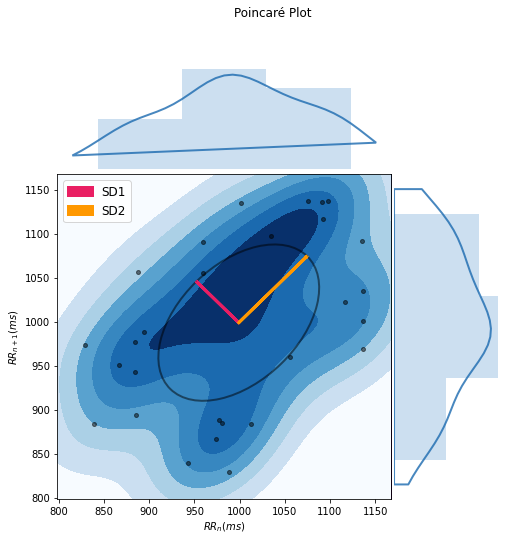

In [11]:
rndSignal.ppg_hrv_nonlinear(savvyppg_signal.data_ppg,1000, show = True)